# ESRB rating machine learning

In [78]:
%pip install numpy==1.24.1
%pip install pandas==1.5.3
%pip install seaborn==0.12.2
%pip install scikit-learn==1.2.0
%pip install plotly==5.12.0
%pip install matplotlib==3.6.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [79]:
# import general libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [80]:
# CSV file with the ESRB rating data
df = pd.read_csv('Video_games_esrb_rating.csv')

In [81]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


## Pre processing

In [82]:
# Correcting typo in the original dataframe
df = df.rename(columns={"strong_janguage": "strong_language"})

In [83]:
# check all columns
# check if there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [84]:
# drop the title and console columns, because it is not needed for the analysis
df.drop(['title', 'console'], inplace=True, axis=1)

In [85]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [86]:
df.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,T


In [87]:
# Replace the ESRB ratings with numbers, this is needed for some of the models
df['esrb_rating'] = df['esrb_rating'].replace(
    'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)

In [88]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

## Splitting dataset

In [89]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

## Decision tree (Anwar Ammor)

In [152]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=SEED)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [150]:
# Make predictions
y_pred_tree = classifier.predict(X_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 96   2   1   0]
 [  3  51   7   0]
 [  2  19 118   7]
 [  0   0  10  63]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.71      0.84      0.77        61
           2       0.87      0.81      0.84       146
           3       0.90      0.86      0.88        73

    accuracy                           0.87       379
   macro avg       0.86      0.87      0.86       379
weighted avg       0.87      0.87      0.87       379



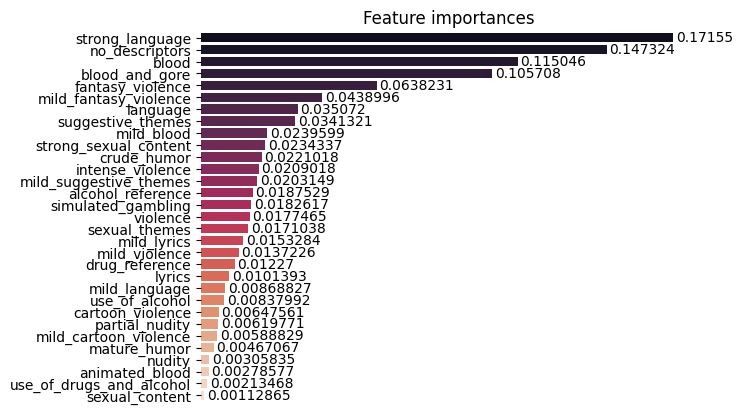

In [93]:
# print feature importance
features_df = pd.DataFrame(
    {'features': classifier.feature_names_in_, 'importances': classifier.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

## Random Forest (Remco de Wilde)

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Create instance of random forest classifier
rfc = RandomForestClassifier(n_estimators=37,
                             max_depth=17,
                             random_state=SEED)

In [95]:
# Train the classifier
rfc.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rt = rfc.predict(X_test)

In [96]:
features = X.columns.values  # The name of each column

# for estimator in rfc.estimators_:
#     print(estimator)
#     plt.figure(figsize=(12, 6))
#     tree.plot_tree(estimator,
#                    feature_names=features,
#                    class_names=ratings,
#                    fontsize=8,
#                    filled=True,
#                    rounded=True)
#     plt.show()

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        99
           1       0.75      0.87      0.80        61
           2       0.88      0.84      0.86       146
           3       0.90      0.86      0.88        73

    accuracy                           0.88       379
   macro avg       0.87      0.88      0.88       379
weighted avg       0.89      0.88      0.88       379



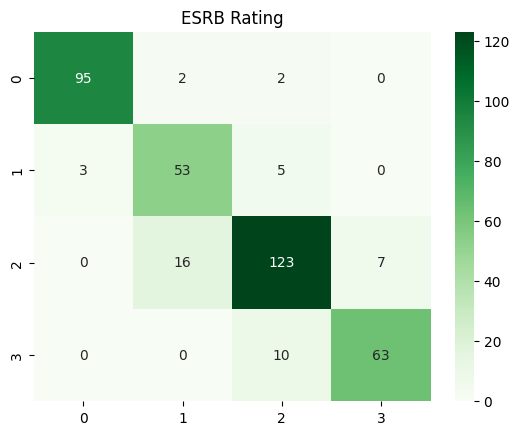

In [97]:
cm = confusion_matrix(y_test, y_pred_rt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens').set_title('ESRB Rating')

print(classification_report(y_test,y_pred_rt))

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rt))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rt)))

Mean Absolute Error: 0.12401055408970976
Mean Squared Error: 0.1345646437994723
Root Mean Squared Error: 0.3668305382591154


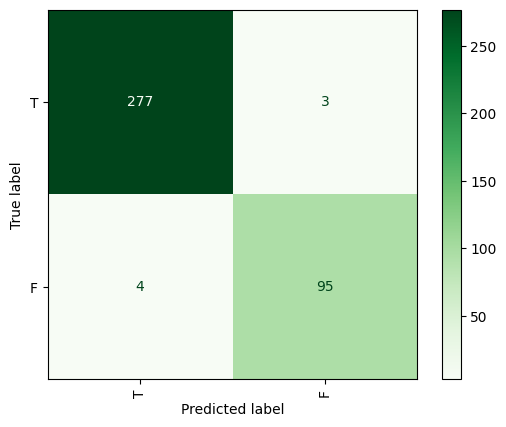

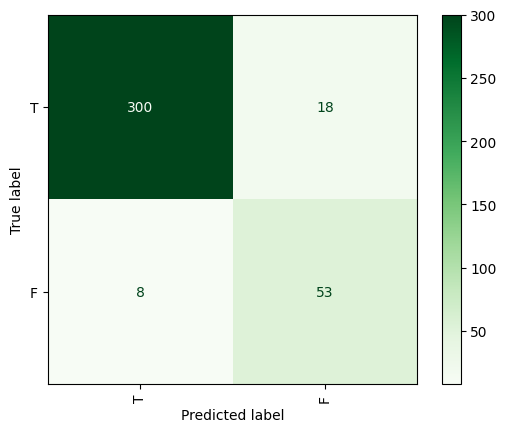

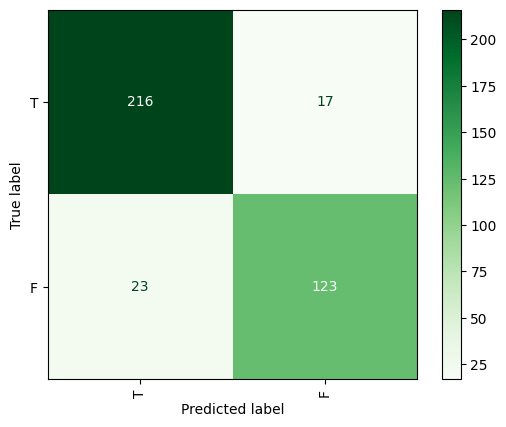

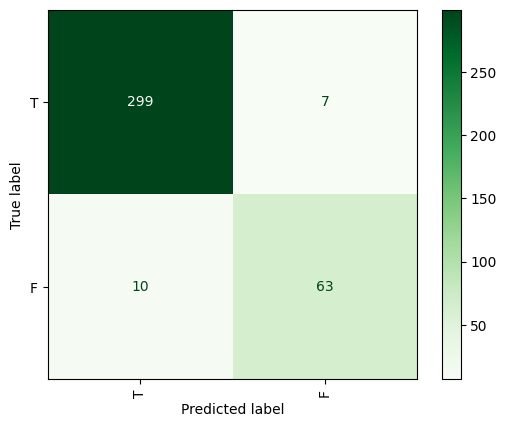

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, y_pred_rt)

for confusion_matrix in mcm:
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['T','F'])
    disp.plot(include_values=True, cmap="Greens", ax=None, xticks_rotation="vertical")
    plt.show()

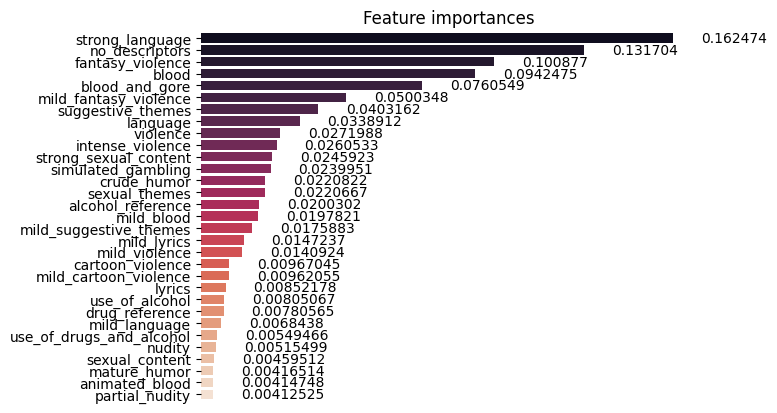

In [100]:
# Create a dataframe with the features and their importance
features_df = pd.DataFrame(
    {'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=20)
    g.margins(y=0.005)

## k-NN (Thom Hooijer)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()

In [102]:
# Scale both X_train and X_test
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [103]:
# Create a KNN classifier
knnc = KNeighborsClassifier()
knnc.fit(X_train_knn, y_train)

KNeighborsClassifier()

In [104]:
# Predict the classes of the test data
y_pred_knn = knnc.predict(X_test_knn)

In [105]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.values, y_pred_knn)

array([[ 97,   1,   1,   0],
       [  7,  39,  15,   0],
       [  2,  21, 111,  12],
       [  1,   0,  11,  61]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.64      0.64      0.64        61
           2       0.80      0.76      0.78       146
           3       0.84      0.84      0.84        73

    accuracy                           0.81       379
   macro avg       0.80      0.80      0.80       379
weighted avg       0.81      0.81      0.81       379



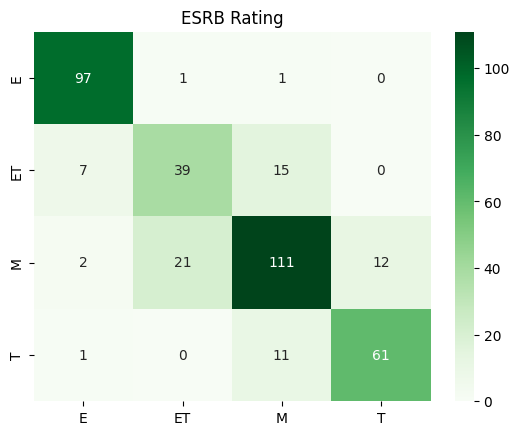

In [106]:
# Adding classes names for better interpretation
classes_names = ratings
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens').set_title('ESRB Rating')
print(classification_report(y_test, y_pred_knn))

In [107]:
from sklearn.metrics import f1_score
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

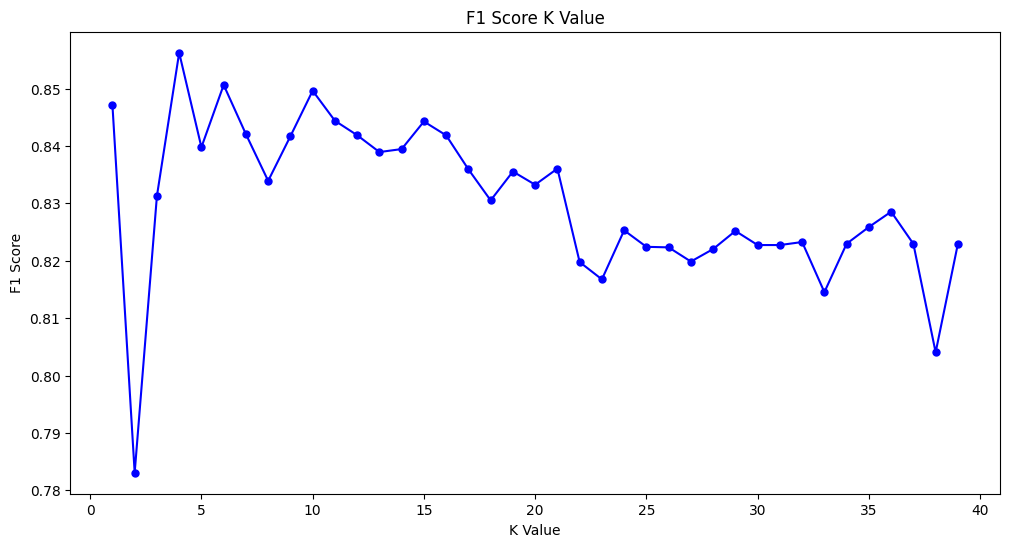

In [108]:
# Plotting the f1 score for each K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='blue', marker='.',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [109]:
# Plotting the f1 score for each K value
t = pd.DataFrame(f1s)

In [110]:
# Get the index of the maximum f1 score value, this is the optimal K value
optimal_n_index_value = t.idxmax().tolist()[0]
# Add 1 to fix the index
optimal_n_index_value += 1

In [111]:
# Create a KNN classifier with a optimal k value (K=6)
optimal_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_n_index_value)
optimal_knn_classifier.fit(X_train, y_train)
optimal_knn_pred = optimal_knn_classifier.predict(X_test)
print(classification_report(y_test, optimal_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.66      0.85      0.74        61
           2       0.90      0.77      0.83       146
           3       0.93      0.85      0.89        73

    accuracy                           0.85       379
   macro avg       0.85      0.86      0.85       379
weighted avg       0.87      0.85      0.86       379



## Support Vector Machine (Remco de Wilde)

In [112]:
from sklearn.svm import SVC

In [113]:
# Create the model
svclassifier = SVC(kernel='rbf', probability=True)
# Train the model
svclassifier.fit(X_train, y_train)

SVC(probability=True)

In [114]:
# Make predictions
y_pred_svm = svclassifier.predict(X_test)

Text(0.5, 1.0, 'ESRB Rating')

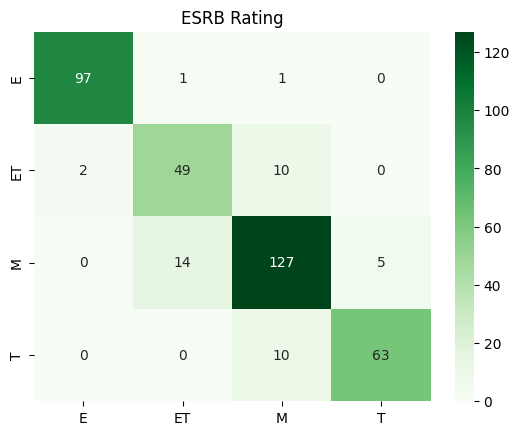

In [115]:
# Evaluate the model
cm = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=ratings, yticklabels=ratings).set_title('ESRB Rating')

In [116]:
# Print the classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       0.77      0.80      0.78        61
           2       0.86      0.87      0.86       146
           3       0.93      0.86      0.89        73

    accuracy                           0.89       379
   macro avg       0.88      0.88      0.88       379
weighted avg       0.89      0.89      0.89       379



## Ensemble Voting Classifier (Remco de Wilde)

In [117]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('RF', rfc), ('DT', classifier), ('SVC', svclassifier), ('KNN', optimal_knn_classifier)],
                        voting='soft')

In [118]:
# Training the voting classifier
eclf = eclf.fit(X, y)

In [119]:
y_pred_eclf = eclf.predict(X_test)

In [120]:
cm = confusion_matrix(y_test,y_pred_eclf)

Text(0.5, 1.0, 'ESRB Rating')

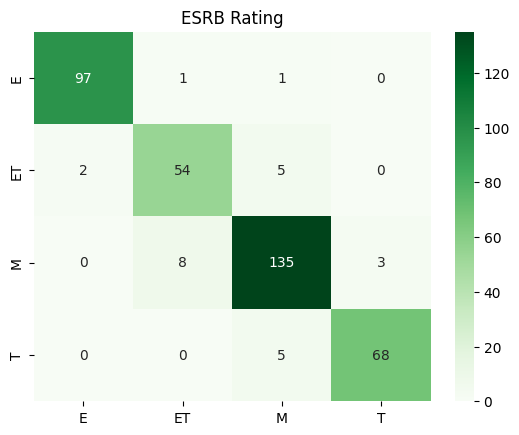

In [121]:
Labels = ratings
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels).set_title('ESRB Rating')

In [122]:
# Printing the classification report
print(classification_report(y_test,y_pred_eclf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       0.86      0.89      0.87        61
           2       0.92      0.92      0.92       146
           3       0.96      0.93      0.94        73

    accuracy                           0.93       379
   macro avg       0.93      0.93      0.93       379
weighted avg       0.93      0.93      0.93       379



## Conclusie

Elk van de geteste machinelearning modellen kan gebruikt worden om een voorspelling te doen. De accuratie van de voorspellingen is echter niet altijd heel hoog. Dit verschilt dan ook wel per model.
Uit de vier `Standaard` geteste modellen blijkt dat `Random Forest` de beste resultaten geeft. Dit model heeft een accuracy (en hoogste f1-score)van 0.88. Als nu alle modelen worden gebruikt om tot een `VotingClassifier` te komen dan is de accuracy 0.94 (en de hoogste f1-score). Dit is een stuk hoger dan de andere modellen. Dit model is dus het meest geschikt om te gebruiken om een voorspelling te doen. Onze hoofdvraag `Is het mogelijk om op basis van een aantal voorwaarden te voorspellen dat een game een bepaalde ESRB rating heeft?` kan dus met een `Ja` beantwoord worden. Hierbij moet wel gezegd worden dat de voorspellingen niet altijd heel nauwkeurig zijn. Dit kan mogelijk worden verbeterd door meer data te gebruiken, maar het is uiteraard ook mogelijk dat dit machinelearning model door de aard van de data niet heel nauwkeurig kan voorspellen.


## Testen voor variabelen

### Testen voor `max_depth` Random Forest

In [123]:
data = []

for i in range(1, 20):
    rfc2 = RandomForestClassifier(n_estimators=20,
                                    max_depth=i,
                                    random_state=SEED)

    rfc2.fit(X_train, y_train)
    # Predict the test set labels
    y_pred = rfc2.predict(X_test)

    serie = pd.Series([i, mean_absolute_error(y_test, y_pred), mean_squared_error(
        y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))], index=['depth', 'mae', 'mse', 'rmse'])
    data.append(serie)

In [124]:
# Create a dataframe with the results
df_depth = pd.DataFrame(data)
df_depth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   depth   19 non-null     float64
 1   mae     19 non-null     float64
 2   mse     19 non-null     float64
 3   rmse    19 non-null     float64
dtypes: float64(4)
memory usage: 736.0 bytes


In [125]:
# Plot the results
pd.options.plotting.backend = "plotly"
df_depth.plot.bar(x='depth', y=['mae', 'mse', 'rmse'], title='Random Forest Classifier',
            barmode='group', labels={'value': 'Error', 'depth': 'Depth'})

In [126]:
# De laagste error waarden:
df_depth.min()

# Conclusie:
# Een depth van 17 geeft op alle gemeten punten de laagste error "rate".

depth    1.000000
mae      0.124011
mse      0.129288
rmse     0.359566
dtype: float64

### Testen voor `n_estimators` Random Forest

In [127]:
data = []
n_estimators = np.arange(1, 100, 1)

for i in n_estimators:
    rfc3 = RandomForestClassifier(n_estimators=i,
                                 max_depth=17,
                                 random_state=SEED)

    # train the model
    rfc3.fit(X_train, y_train)
    # Predict the test set labels
    y_pred = rfc3.predict(X_test)

    # Create a series with the calculated metrics and append it to the data list
    serie = pd.Series([i, mean_absolute_error(y_test, y_pred), mean_squared_error(
        y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))], index=['n_estimators', 'mae', 'mse', 'rmse'])
    data.append(serie)

In [128]:
# Create a dataframe with the data list
df_n_estim = pd.DataFrame(data)
df_n_estim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_estimators  99 non-null     float64
 1   mae           99 non-null     float64
 2   mse           99 non-null     float64
 3   rmse          99 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [129]:
# Plot the dataframe
df_n_estim.plot(y=['mae', 'mse', 'rmse'], kind='line')

In [130]:
df_n_estim.min()

n_estimators    1.000000
mae             0.118734
mse             0.124011
rmse            0.352151
dtype: float64

In [131]:
df_n_estim.idxmin()
# Conclussie: The best n_estimators value is 37

n_estimators     0
mae             37
mse             37
rmse            37
dtype: int64

### Testen voor beste kernel SVM

In [132]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
data = []


for i in kernel:
    svclassifier = SVC(kernel=i, probability=True, random_state=SEED)
    svclassifier.fit(X_train, y_train)
    y_pred_svm = svclassifier.predict(X_test)
    serie = pd.Series([i, mean_absolute_error(y_test, y_pred_svm), mean_squared_error(y_test, y_pred_svm), np.sqrt(mean_squared_error(y_test, y_pred_svm))], index=['kernel', 'mae', 'mse', 'rmse'])
    data.append(serie)

In [133]:
svm_df = pd.DataFrame(data)

In [134]:
svm_df

,kernel,mae,mse,rmse
0,linear,0.147757,0.158311,0.397884
1,poly,0.150396,0.187335,0.432822
2,rbf,0.116095,0.121372,0.348385
3,sigmoid,0.237467,0.263852,0.513665


In [135]:
svm_df.plot.bar(x='kernel', barmode="group" , y=['mae', 'mse', 'rmse'], title='Support Vector Machine')

In [136]:
svm_df.min()

kernel      linear
mae       0.116095
mse       0.121372
rmse      0.348385
dtype: object

In [137]:
# Concluse: rbf lijkt de beste kernel te zijn voor deze dataset

### Testen voor criterion Decision Tree

In [138]:
cirterion = ['gini', 'entropy']
data = []


for i in cirterion:
    classifier = DecisionTreeClassifier(criterion=i, random_state=SEED)
    classifier.fit(X_train, y_train)
    y_pred_tree = classifier.predict(X_test)
    serie = pd.Series([i, mean_absolute_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_tree), np.sqrt(mean_squared_error(y_test, y_pred_tree))], index=['kernel', 'mae', 'mse', 'rmse'])
    data.append(serie)

In [139]:
cirterion_df = pd.DataFrame(data)
cirterion_df

,kernel,mae,mse,rmse
0,gini,0.147757,0.163588,0.404461
1,entropy,0.142480,0.158311,0.397884


In [140]:
# Conclusie: entropy lijkt de beste cirterion te zijn voor deze dataset

### Testen voor splitter Decision Tree
{“best”, “random”}

In [141]:
splitter = ['best', 'random']
data = []


for i in splitter:
    classifier = DecisionTreeClassifier(splitter=i, random_state=SEED)
    classifier.fit(X_train, y_train)
    y_pred_tree = classifier.predict(X_test)
    serie = pd.Series([i, mean_absolute_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_tree), np.sqrt(mean_squared_error(y_test, y_pred_tree))], index=['kernel', 'mae', 'mse', 'rmse'])
    data.append(serie)

In [142]:
splitter_df = pd.DataFrame(data)
splitter_df


,kernel,mae,mse,rmse
0,best,0.147757,0.163588,0.404461
1,random,0.145119,0.160950,0.401186


In [ ]:
# Conclusie: random lijkt de beste splitter te zijn voor deze dataset

### Testen voor max_depth Decision Tree

In [ ]:
data = []
for i in range(1, 20):
    classifier = DecisionTreeClassifier(max_depth=i, random_state=SEED)
    classifier.fit(X_train, y_train)
    y_pred_tree = classifier.predict(X_test)
    serie = pd.Series([i, mean_absolute_error(y_test, y_pred_tree), mean_squared_error(y_test, y_pred_tree), np.sqrt(mean_squared_error(y_test, y_pred_tree))], index=['kernel', 'mae', 'mse', 'rmse'])
    data.append(serie)